In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [2]:
sc._settings.ScanpyConfig.n_jobs = 8

In [3]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [56]:
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/cycif_ovca/quantification/cycif_single_cell_spatial_25.csv', index_col=0)

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
len(df.Patient_code_final.unique())

In [ ]:
len(df.Sample_code_final.unique())

In [ ]:
df.Sample_code_final.unique()

In [ ]:
df.GlobalCellType2.value_counts()

In [57]:
df.drop(columns=['neighbordood_cluster2', 'Stage', ], inplace=True) 
df.rename(columns={'GlobalCellType2': 'cell_type', 'X.Position': 'x', 'Y.Position': 'y', 'ID': 'cell_id', 'Sample_code_final': 'sample_id'}, inplace=True)

In [58]:
df = reorder_columns(df, 'cell_type', 'sample_id')

In [59]:
df = reorder_columns(df, 'cell_id', 'y')

In [20]:
df

,pERK,FOXP3,LaminB1,pSTAT1,IBA1,MHCII,CD57,CD8a,SMA,CD11c,...,Annexin,Ecadherin,FOXOA3,KRAS,x,y,cell_id,Patient_code_final,sample_id,cell_type
1,0.372753,0.337156,0.367110,0.405686,0.408141,0.486107,0.385586,0.366450,0.292237,0.363262,...,0.400954,0.356802,0.364615,0.398076,2387,6443,20284,S013,S013_primary,IBA1.CD163.Macrophages
2,0.401036,0.509924,0.512477,0.480357,0.512132,0.634644,0.512915,0.511404,0.505456,0.508607,...,0.409148,0.512238,0.512377,0.511586,3426,7956,43273,S013,S013_primary,Proliferating.epithelial
3,0.361901,0.503882,0.504551,0.437978,0.505056,0.396402,0.505478,0.504477,0.505909,0.503802,...,0.442016,0.504303,0.505878,0.504723,1133,5112,562,S013,S013_primary,Fibroblast
4,0.368904,0.536897,0.545607,0.423388,0.542831,0.629951,0.544818,0.538702,0.528172,0.536701,...,0.375871,0.543347,0.544746,0.539554,2746,7921,29026,S013,S013_primary,Proliferating.EMT
5,0.388265,0.501220,0.502478,0.415093,0.502006,0.516949,0.502401,0.501875,0.416413,0.500364,...,0.364061,0.501650,0.501756,0.500740,4891,2644,67527,S013,S013_primary,Proliferating.EMT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422538,0.461307,0.000763,0.001621,0.518292,0.001122,0.228771,0.000895,0.001016,0.000809,0.001237,...,0.528250,0.001104,0.001428,0.001950,4097,7476,36244,S010,S010_primary,Epithelial
6422539,0.377578,0.000539,0.001472,0.436890,0.000676,0.203623,0.000662,0.000909,0.001035,0.001010,...,0.506569,0.001216,0.001379,0.001910,5185,7323,44801,S010,S010_primary,Epithelial
6422540,0.485293,0.000816,0.001623,0.530833,0.001099,0.223898,0.001038,0.001117,0.001232,0.001130,...,0.565752,0.001024,0.001482,0.002103,2624,7092,17102,S010,S010_primary,Proliferating.epithelial
6422541,0.434089,0.000658,0.001377,0.477240,0.001061,0.209598,0.000784,0.001857,0.001966,0.001138,...,0.673068,0.000535,0.001446,0.001910,4855,5271,42468,S010,S010_primary,CD8.T.cells


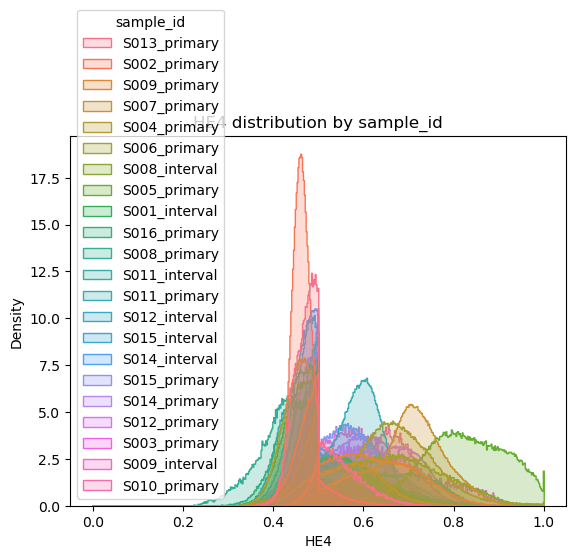

In [43]:
marker = 'HE4'
sns.histplot(data=df, x=marker, bins=500, hue='sample_id', element='step', stat='density', common_norm=False)
plt.xlabel(marker)
plt.ylabel('Density')
#plt.xlim(0, 0.02)
plt.title(f'{marker} distribution by sample_id')
plt.show()

Text(0.5, 1.0, 'CD3d median by sample_id')

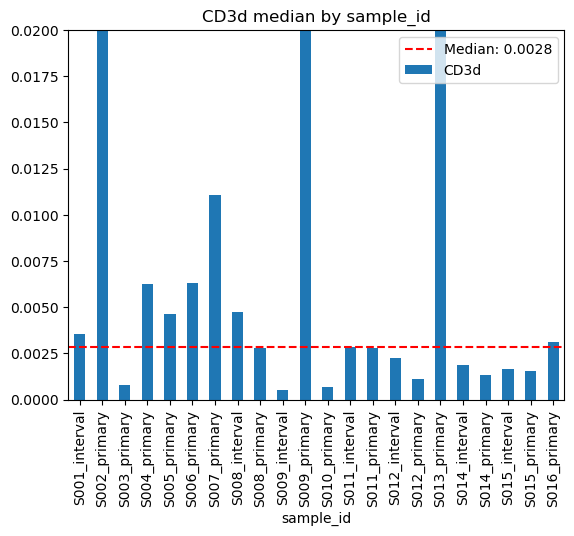

In [41]:
cd3d_median = df.groupby('sample_id')['CD3d'].median().median()
df.groupby('sample_id')['CD3d'].median().plot(kind='bar', ylim=[0, 0.02])
plt.axhline(cd3d_median, color='red', linestyle='--', label=f'Median: {cd3d_median:.4f}')
plt.legend()
plt.title('CD3d median by sample_id')

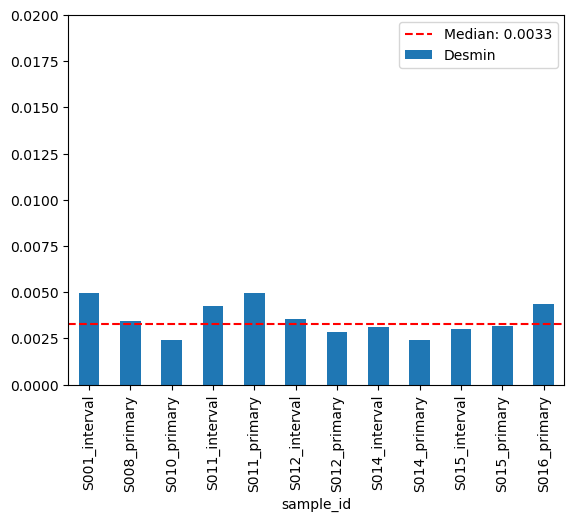

In [66]:
desmin_median = df.groupby('sample_id')['Desmin'].median().median()
df.groupby('sample_id')['Desmin'].median().plot(kind='bar', ylim=[0, 0.02])
plt.axhline(desmin_median, color='red', linestyle='--', label=f'Median: {desmin_median:.4f}')
plt.legend()

In [65]:
remove_samples = ['S002_primary', 'S003_primary', 'S004_primary', 'S007_primary', 'S009_interval', 'S009_primary', 'S013_primary', 'S006_primary', 'S005_primary', 'S008_interval']
df = df[~df['sample_id'].isin(remove_samples)]

In [ ]:
desmin_median = df.groupby('sample_id')['Desmin'].median().median()
df.groupby('sample_id')['Desmin'].median().plot(kind='bar', ylim=[0, 0.02])
plt.axhline(desmin_median, color='red', linestyle='--', label=f'Median: {desmin_median:.4f}')
plt.legend()

In [67]:
X_columns = df.columns[:df.columns.get_loc('x')]
obs_columns =df.columns[df.columns.get_loc('x'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [68]:

adata.raw = adata.copy()
#adata.X = np.log1p(adata.X)
adata.layers['zscore'] = z_score_normalization(adata.X)
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')


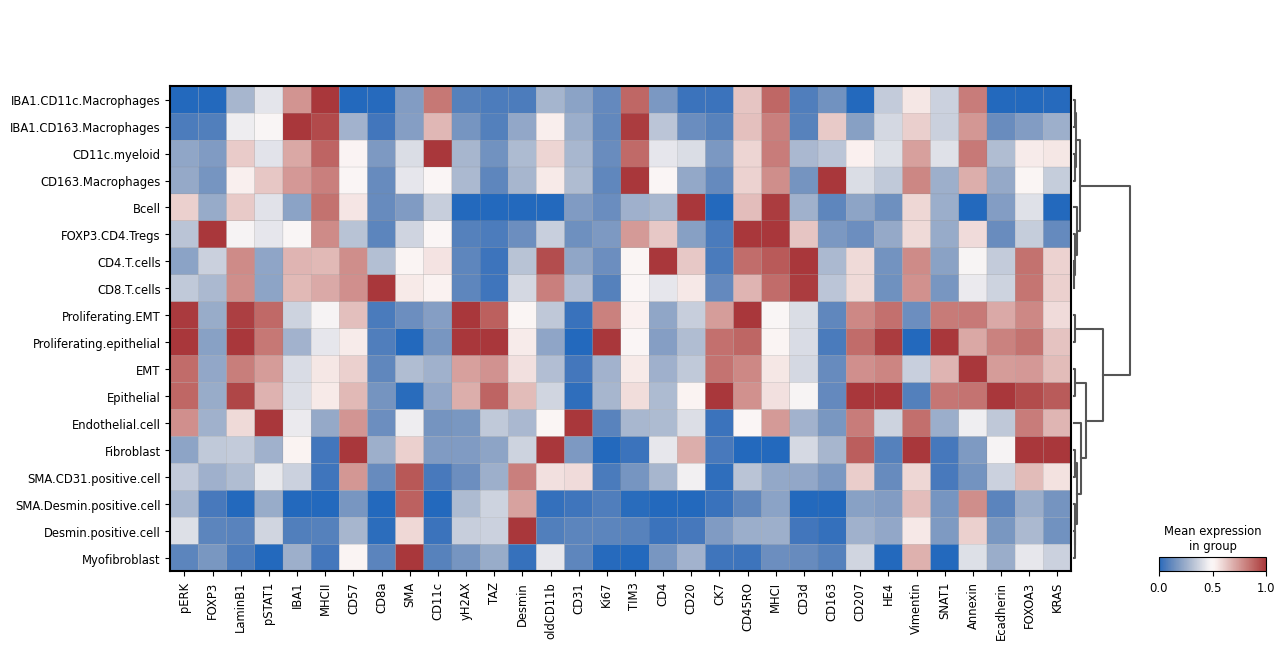

In [72]:
sc.tl.dendrogram(adata, groupby='cell_type')
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var'
                 )

# Harmonize celltype labels

In [73]:
df.columns

Index(['pERK', 'FOXP3', 'LaminB1', 'pSTAT1', 'IBA1', 'MHCII', 'CD57', 'CD8a',
       'SMA', 'CD11c', 'yH2AX', 'TAZ', 'Desmin', 'oldCD11b', 'CD31', 'Ki67',
       'TIM3', 'CD4', 'CD20', 'CK7', 'CD45RO', 'MHCI', 'CD3d', 'CD163',
       'CD207', 'HE4', 'Vimentin', 'SNAT1', 'Annexin', 'Ecadherin', 'FOXOA3',
       'KRAS', 'x', 'y', 'cell_id', 'Patient_code_final', 'sample_id',
       'cell_type'],
      dtype='object')

In [75]:
df['cell_type'].value_counts()

cell_type
Epithelial                  297422
Desmin.positive.cell        273302
IBA1.CD163.Macrophages      269075
EMT                         255671
SMA.CD31.positive.cell      237455
Fibroblast                  196050
Proliferating.epithelial    194090
CD8.T.cells                 157280
Myofibroblast               132229
CD11c.myeloid               130391
IBA1.CD11c.Macrophages      122606
Proliferating.EMT           110984
SMA.Desmin.positive.cell    108358
CD4.T.cells                  96678
Endothelial.cell             54607
FOXP3.CD4.Tregs              46486
CD163.Macrophages            44608
Bcell                         8419
Name: count, dtype: int64

In [ ]:
df['cell_type'] = df['cell_type'].replace({'Epithelial': 'Cancer', 'Desmin.positive.cell': 'undefined', 'IBA1.CD163.Macrophages': 'M2_Macrophage', 'EMT': 'Cancer_EMT', 
                                           'SMA.CD31.positive.cell': 'EndoMT'})

df['cell_type'].value_counts()

In [ ]:
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv', index=False)

# Implement different levels of granularity

In [ ]:
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv')
df['cell_type'].value_counts()

In [ ]:
df.columns

In [ ]:
df['level_2_cell_type'] = df['cell_type']
df['level_2_cell_type'] = df['level_2_cell_type'].replace({'CD8+_T_cell':'Lymphoid_immune', 'M2_Macrophage':'Myeloid_immune', 'CD4+_T_cell':'Lymphoid_immune', 'Plasma_cell':'Lymphoid_immune',
                                                           'Neutrophil':'Myeloid_immune', 'BnT':'Lymphoid_immune', 'Treg':'Lymphoid_immune', 'Dendritic_cell':'Myeloid_immune', 'B_cell':'Lymphoid_immune',
                                                           'NK_cell':'Lymphoid_immune', 'Plasmacytoid_dendritic_cell':'Myeloid_immune'})
df['level_2_cell_type'].value_counts()

In [ ]:
df['level_1_cell_type'] = df['level_2_cell_type']
df['level_1_cell_type'] = df['level_1_cell_type'].replace({'Lymphoid_immune':'Immune', 'Myeloid_immune':'Immune', 'Stroma':'Stromal'})
df['level_1_cell_type'].value_counts()

In [ ]:
df = reorder_columns(df, 'cell_type', 'level_1_cell_type')
df = reorder_columns(df, 'level_2_cell_type', 'level_1_cell_type')
df 

In [ ]:
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv', index=False)

# Encode uninfomrative variables with different dtypes

In [ ]:
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv')
df.columns

In [ ]:
df['cell_type'].nunique()

In [ ]:
df = df.rename(columns={'ObjectNumber': 'cell_id'})

In [ ]:
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv', index=False)

# Bin celltypes

In [ ]:
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv')
df['cell_type'].value_counts()

In [ ]:
#df['cell_type'] = df['cell_type'].replace({'HLADR':'undefined'})
df['level_1_cell_type'] = df['level_1_cell_type'].replace({'HLADR':'undefined'})
df['level_2_cell_type'] = df['level_2_cell_type'].replace({'HLADR':'undefined'})
df['cell_type'].value_counts()

In [ ]:
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv', index=False)

In [ ]:
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/cycif_ovca/quantification/processed/cycif_ovca_quantification.csv', index=False)